# <h1><center>Sentiment Analysis for Foody&Fooodie<h1><center>

## Business Understanding

### Overview
Foody&Foodie are a family run restaurant in San francisco, CA. As a veteran in the food business they understand that they will need to keep track of sentiments from their customer base to maintain a competitive edge in the market.

### Problem Statement
The management of Foody&Foodie understand the need to find reliable feedback to guide their decision-making aiming to improve their business and match their markets ever changing needs. 


### Challenges
Within the Food industry, they're several measurable parameters to that determine the success of a restaurant and we must find a neutral data set where all these aspects can be fairly evaluated for an accurate result.

### Proposed solution
We will need to create a model to analyze customer sentiments through reviews on restaurants within the target area using a single popular review site, Yelp, to pull the relevant data as it is the most comprehensive compilation of reviews in the target market.



### Objectives
#### Main Objective
- To create a model that could successfully predict the sentiment of a customer’s review. The model would attain a recall score and accuracy score above 80%

#### Specific Objective
- To identify the most common words used in the dataset using a Word cloud.
- To confirm the most common words that are positively and negatively tagged.
- To recognize the products that have been opined by the customers.
- To spot the distribution of the sentiments.















## Data Understanding
Our dataset is a compilation of writen reviews, ratings, review IDs, review date and business IDs from the Yelp website. The compilation of this data allows us to clearly identfy positive and negatve sentiments in relation to a rating given on a scale of 1-5 as well as reactions to the sentiment by readers categorized as cool, useful or funny. 
Post cleaning the data, these are the metrics we will use to isolate and model a collective non biased scale of opinions on restarunts in the area.



In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
# Load restaurant data - This also works
df = pd.read_csv("data.zip")

In [3]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,iBUJvIOkToh2ZECVNq5PDg,iAD32p6h32eKDVxsPHSRHA,YB26JvvGS2LgkxEKOObSAw,5,0,0,0,I've been eating at this restaurant for over 5...,2021-01-08 01:49:36
1,HgEofz6qEQqKYPT7YLA34w,rYvWv-Ny16b1lMcw1IP7JQ,jfIwOEXcVRyhZjM4ISOh4g,1,0,0,0,How does a delivery person from here get lost ...,2021-01-02 00:19:00
2,Kxo5d6EOnOE-vERwQf2a1w,2ntnbUia9Bna62W0fqNcxg,S-VD26LE_LeJNx5nASk_pw,5,0,0,0,"The service is always good, the employees are ...",2021-01-26 18:01:45
3,STqHwh6xd05bgS6FoAgRqw,j4qNLF-VNRF2DwBkUENW-w,yE1raqkLX7OZsjmX3qKIKg,5,0,0,0,two words: whipped. feta. \nexplosion of amazi...,2021-01-27 23:28:03
4,u0smrr16uVQ8pgSEseXcKg,H3P9EB7J9HP6PzkVjgFiOg,oQ5CPRt0R3AzFvcjNOqB1w,5,0,0,0,So day 2 in Nashville. I gotta get some BBQ. M...,2021-03-17 20:09:00


In [4]:
# Drop irrelevant columns
df = df.drop(columns=['review_id', 'user_id', 'business_id'])


In [5]:
df.columns

Index(['stars', 'useful', 'funny', 'cool', 'text', 'date'], dtype='object')

In [6]:
df.describe()
    

,stars,useful,funny,cool
count,429771.000000,429771.000000,429771.000000,429771.000000
mean,3.820449,0.822806,0.212450,0.487885
std,1.513978,2.818655,1.231838,2.382432
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,261.000000,101.000000,164.000000


In [7]:
# Removing duplicates rows
df.drop_duplicates(inplace=True)


In [8]:
# Check for missing values
df.isnull().sum()

df.dropna(inplace=True)

In [9]:
# Convert all text to lowercase
df['text'] = df['text'].str.lower()

In [11]:
# Remove punctuation
df['text'] = df['text'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [12]:
# Remove numbers
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [13]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

In [31]:
# Initialize the WordNet lemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Apply lemmatization
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kerub\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# Path to the existing file
file_path = r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt'

# Save the cleaned data, overwriting the original file
df.to_csv(file_path, index=False)

print(f"Cleaned data has been saved and overwritten the existing file: {file_path}")


Cleaned data has been saved and overwritten the existing file: C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt


In [16]:
#Loading the cleaned dataset
# Path to the CSV file
file_path = r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt'

df = pd.read_csv(r'C:\Users\kerub\Documents\Moringa\Sentiment-Analysis\restaurant_reviews.txt')

# Display the first five rows
print(df.head())


   stars  useful  funny  cool  \
0      5       0      0     0   
1      1       0      0     0   
2      5       0      0     0   
3      5       0      0     0   
4      5       0      0     0   

                                                text                 date  
0  ive eating restaurant year staple ab family li...  2021-01-08 01:49:36  
1  delivery person get lost heard google map food...  2021-01-02 00:19:00  
2  service always good employee nice vegan africa...  2021-01-26 18:01:45  
3  two word whipped feta explosion amazingness hi...  2021-01-27 23:28:03  
4  day nashville got ta get bbq cousin recommende...  2021-03-17 20:09:00  


## Exploratory Data Analysis (EDA) ##

In [47]:
#Handling missing values

 # Convert non-string values to strings, filling NaNs with an empty string
df['text'] = df['text'].fillna('').astype(str)

# Calculate the length of each text entry
df['text_Length'] = df['text'].apply(len)

# Display summary statistics of the text lengths
print(df['text_Length'].describe())

count    429771.000000
mean        295.900915
std         268.157705
min           0.000000
25%         124.000000
50%         213.000000
75%         371.000000
max        3523.000000
Name: text_Length, dtype: float64


In [48]:
# Check for basic information about the data
df.info()

# Summary statistics of the text lengths
df['text_Length'] = df['text'].apply(len)
df['text_Length'].describe()

# Check for the distribution of sentiment labels (if available)
if 'Sentiment' in df.columns:
    print(df['Sentiment'].value_counts())
    sns.countplot(x='Sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429771 entries, 0 to 429770
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   stars        429771 non-null  int64 
 1   useful       429771 non-null  int64 
 2   funny        429771 non-null  int64 
 3   cool         429771 non-null  int64 
 4   text         429771 non-null  object
 5   date         429771 non-null  object
 6   text_Length  429771 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 23.0+ MB


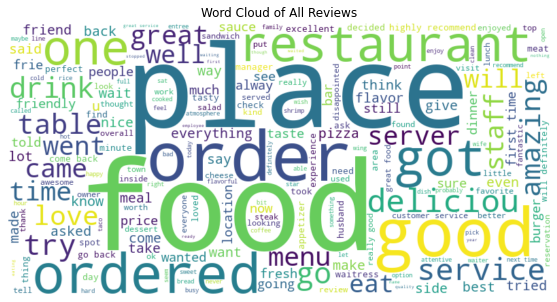

In [10]:
# Generate a word cloud for the entire dataset
from wordcloud import WordCloud

all_reviews = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

# Generate separate word clouds for positive and negative sentiments if labeled
if 'Sentiment' in df.columns:
    positive_reviews = ' '.join(df[df['Sentiment'] == 'positive']['Review'])
    negative_reviews = ' '.join(df[df['Sentiment'] == 'negative']['Review'])
    
    # Positive reviews word cloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Positive Reviews')
    plt.show()
    
    # Negative reviews word cloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation="bilinear")
    plt.axis('off')
    plt.title('Word Cloud of Negative Reviews')
    plt.show()


### Distribution of Review Lengths

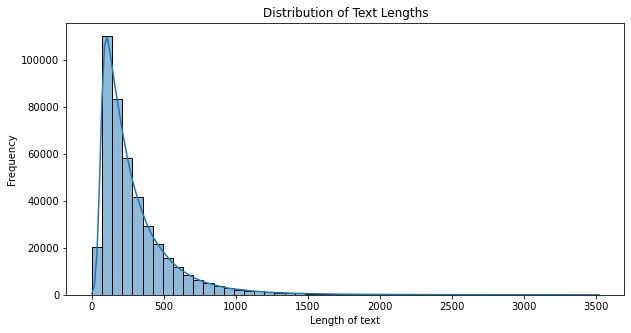

In [53]:
# Plot the distribution of review lengths
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df['text_Length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of text')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Star Ratings

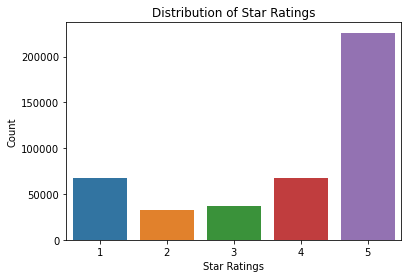

In [54]:
# Bar plot for the distribution of star ratings
sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Ratings')
plt.ylabel('Count')
plt.show()


#### Distribution of "Cool", "Useful", and "Funny" Votes

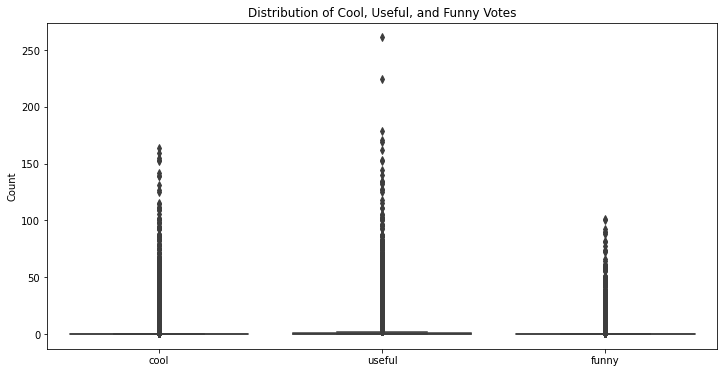

In [55]:
# Boxplot for cool, useful, and funny votes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['cool', 'useful', 'funny']])
plt.title('Distribution of Cool, Useful, and Funny Votes')
plt.ylabel('Count')
plt.show()

 ### Top Most Frequent Words

Lets dentify the most frequent words that can help understand common themes in the dataset.

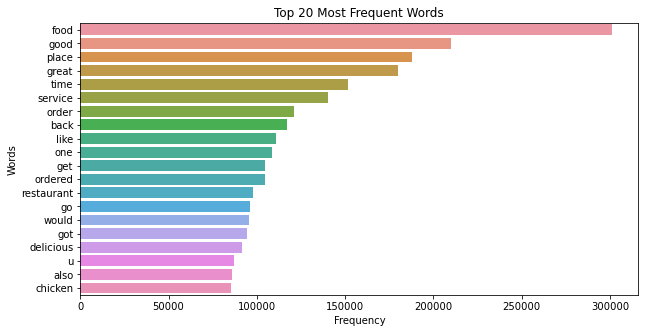

In [61]:
from collections import Counter

# Tokenize the reviews and remove stopwords
stop_words = set(stopwords.words('english'))
df['Tokens'] = df['text'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])

# Flatten the list of tokens
all_words = [word for tokens in df['Tokens'] for word in tokens]

# Get the frequency distribution of words
word_freq = Counter(all_words)

# Plot the top N most frequent words
top_n = 20
common_words = word_freq.most_common(top_n)
words, counts = zip(*common_words)

# Create a DataFrame for plotting
df_plot = pd.DataFrame({'Word': words, 'Frequency': counts})

plt.figure(figsize=(10, 5))
sns.barplot(x='Frequency', y='Word', data=df_plot)
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

### Correlation Analysis

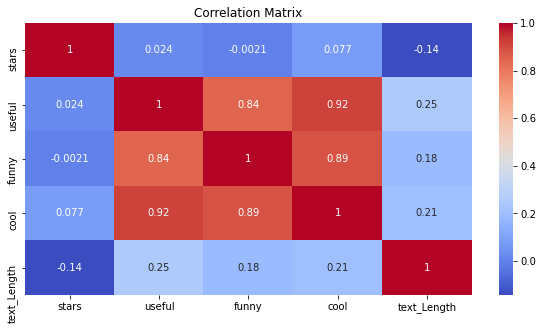

In [64]:
if df.select_dtypes(include=['number']).shape[1] > 0:  
    plt.figure(figsize=(10, 5))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
